In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.insert(1, '../src/')
from titanic import *

/home/ian/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# importing data sets from kernel 

train = pd.read_csv('../data/raw/train.csv')
test = pd.read_csv('../data/raw/test.csv')
print('     In Training Set:')
identify_blanks(train)
print('     In Test Set:')
identify_blanks(test)
train.head()

     In Training Set:
column PassengerId has 0 missing values.  0%
column Survived has 0 missing values.  0%
column Pclass has 0 missing values.  0%
column Name has 0 missing values.  0%
column Sex has 0 missing values.  0%
column Age has 177 missing values.  19%
column SibSp has 0 missing values.  0%
column Parch has 0 missing values.  0%
column Ticket has 0 missing values.  0%
column Fare has 0 missing values.  0%
column Cabin has 687 missing values.  77%
column Embarked has 2 missing values.  0%
     In Test Set:
column PassengerId has 0 missing values.  0%
column Pclass has 0 missing values.  0%
column Name has 0 missing values.  0%
column Sex has 0 missing values.  0%
column Age has 86 missing values.  20%
column SibSp has 0 missing values.  0%
column Parch has 0 missing values.  0%
column Ticket has 0 missing values.  0%
column Fare has 1 missing values.  0%
column Cabin has 327 missing values.  78%
column Embarked has 0 missing values.  0%


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Fill missing data

In [3]:
df = one_hot_age_gender(train)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Boy,Girl,Man,Woman
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


In [4]:
m = len(df.loc[df['Man'] == 1])
w = len(df.loc[df['Woman'] == 1])
b = len(df.loc[df['Boy'] == 1])
g = len(df.loc[df['Girl'] == 1])
tot = m + w + b + g
print(f'Total Men:   {m}')
print(f'Total Woman: {w}')
print(f'Total Men:   {b}')
print(f'Total Woman: {g}')
print(f'All Records: {tot}')
len(df)

Total Men:   533
Total Woman: 235
Total Men:   44
Total Woman: 79
All Records: 891


891

In [5]:
df = split_cabin(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Boy,Girl,Man,Woman,Cabin Prefix,Cabin Number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,NaN,<NA>
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,C,85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,1,NaN,<NA>
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,C,123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,NaN,<NA>


In [6]:
df = append_one_hot(df, 'Embarked')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Boy,Girl,Man,Woman,Cabin Prefix,Cabin Number,Embarked C,Embarked Q,Embarked S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,0,0,1,0,NaN,<NA>,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,0,0,0,1,C,85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,0,0,1,NaN,<NA>,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,0,0,0,1,C,123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,0,0,1,0,NaN,<NA>,0,0,1


In [7]:
df = append_one_hot(df, 'Cabin Prefix')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Man,Woman,Cabin Prefix,Cabin Number,Embarked C,Embarked Q,Embarked S,Cabin Prefix C,Cabin Prefix Q,Cabin Prefix S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,NaN,<NA>,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,C,85,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,NaN,<NA>,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,C,123,0,0,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,NaN,<NA>,0,0,1,0,0,1


Test Holdout Accuracy:   0.8340807174887892
Test Holdout Recall:     0.7142857142857143
Test Holdout Precision:  0.8860759493670886
Test Holdout F1:         0.7909604519774011




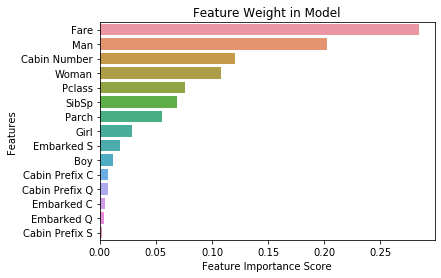




 Predicted    0   1
Actual            
0          116   9
1           28  70


In [8]:
evaluate_df = df.drop(['Cabin Prefix', 'Embarked', 'Cabin', 'Ticket',
                      'Age', 'Sex', 'Name'], axis=1).set_index('PassengerId')
evaluate_df['Cabin Number'] = evaluate_df['Cabin Number'].fillna(0)
model = quick_random_forest(evaluate_df, 'Survived')

In [9]:
df = fill_na_by_group(df, 'Age', ['Boy', 'Girl', 'Man', 'Woman'])
df.head()

Filling missing values for Boy with mean of 5.466749999999999
Filling missing values for Girl with mean of 7.209302325581396
Filling missing values for Man with mean of 33.17312348668281
Filling missing values for Woman with mean of 32.0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Man,Woman,Cabin Prefix,Cabin Number,Embarked C,Embarked Q,Embarked S,Cabin Prefix C,Cabin Prefix Q,Cabin Prefix S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,NaN,<NA>,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,C,85,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,NaN,<NA>,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,C,123,0,0,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,NaN,<NA>,0,0,1,0,0,1


Test Holdout Accuracy:   0.7892376681614349
Test Holdout Recall:     0.675
Test Holdout Precision:  0.72
Test Holdout F1:         0.6967741935483871




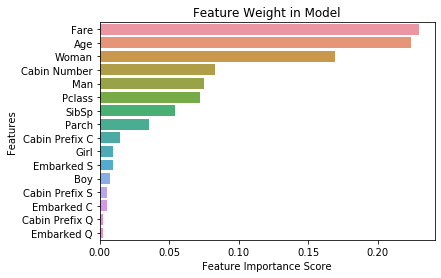




 Predicted    0   1
Actual            
0          122  21
1           26  54


In [11]:
evaluate_df = df.drop(['Cabin Prefix', 'Embarked', 'Cabin', 'Ticket',
                      'Sex', 'Name'], axis=1).set_index('PassengerId')
evaluate_df['Cabin Number'] = evaluate_df['Cabin Number'].fillna(0)
model2 = quick_random_forest(evaluate_df, 'Survived')